# Question 1
### 1) Explicit vs implicit methods
To answer this question, I would mainly focus on the aspect of the stability for these two method, but slightly touching the dfficiency and accuracy aspect for aurgument for comparison. My answer will use some definitions and generate examples to demonstrate my reasoning, as well as trying to explain the stability based on their fundamental mechanism.

To begin with, both **explicit** and **implicit** methods are both numerical finite stepping methods that are used for solving differential equations. They both utilizes local and neighbouring information such as the slope to approximate the information a defined steps apart. The key difference lies in how they used the slope information in approximation.

- **Explicit Methods**: The explicit methods implies the information in the next steps could be directly approximated with the given information at the current step. Such as the forward Euler methods:
$$\frac{y_{n+1} - y_{n}}{\Delta t} = {f}(t_{n},{y}_{n}) \;\;\; \iff \;\;\; y_{n+1} = y_{n} + {\Delta t}\,{f}(t_{n},{y}_{n})$$

Advantage: As the information is readily avaliable, the time stepping is realatively easy, and does not require much computing power.

- **Implicit Methods**: The implicit methods on the other hands is the opposite, where the new step depends on both the known state and the unknown new state. Such as the backward Euler methods:$$\frac{y_{n+1} - y_{n}}{\Delta t} = {f}(t_{n+1},{y}_{n+1}) \;\;\; \iff \;\;\; y_{n+1} - {\Delta t}\,{f}(t_{n+1},{y}_{n+1}) = y_{n}$$ As can be seen as y<sub>n+1</sub> appears on both side of the equation, solving the implicit equation is less straight forward and might require root-finding algorithum such as the newton's method.

Advantage: As will discuss below, implicit methods are unconditionally more stable than explicit methods.

A coded example of solving an ODE using two methods.

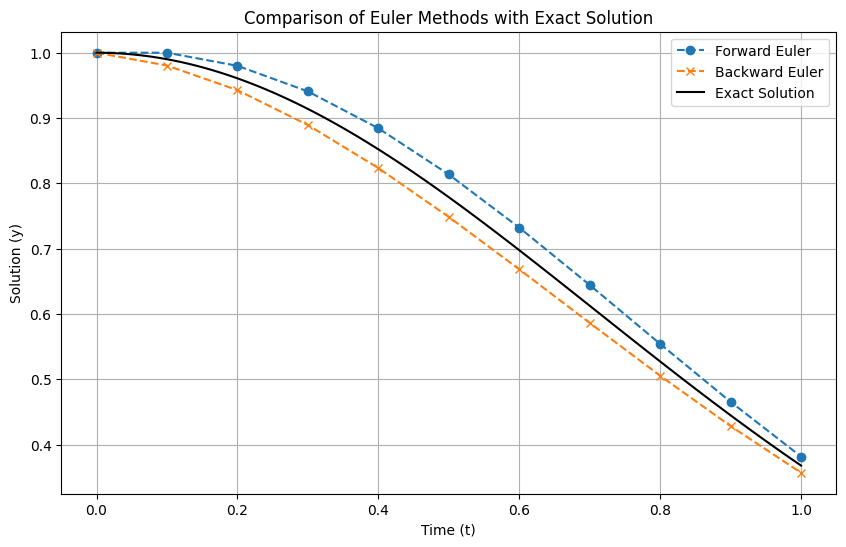

In [2]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define the ODE function
def f(t, y):
    return -2 * t * y

# Forward Euler Method
def forward_euler(f, y0, t0, tf, h):
    t_values = np.arange(t0, tf+h, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h * f(t_values[i-1], y_values[i-1])
    
    return t_values, y_values

# Backward Euler Method
def backward_euler(f, y0, t0, tf, h):
    t_values = np.arange(t0, tf+h, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        # Define the implicit function to solve for y_{n+1}
        implicit_function = lambda y_next: y_next - y_values[i-1] - h * f(t_values[i], y_next)
        # Solve for y_{n+1} using fsolve
        y_values[i] = fsolve(implicit_function, y_values[i-1])
    
    return t_values, y_values

# Define the exact solution for the ODE
def exact_solution(t):
    return np.exp(-t**2)

# Initial conditions and parameters
y0 = 1
t0 = 0
tf = 1
h = 0.1

# Solve using Forward Euler
t_forward, y_forward = forward_euler(f, y0, t0, tf, h)

# Solve using Backward Euler
t_backward, y_backward = backward_euler(f, y0, t0, tf, h)
# Generate the exact solution values for comparison
t_exact = np.linspace(t0, tf, 100)
y_exact = exact_solution(t_exact)

# Plotting the results
plt.figure(figsize=(10, 6))

# Forward Euler plot
plt.plot(t_forward, y_forward, label='Forward Euler', linestyle='--', marker='o')

# Backward Euler plot
plt.plot(t_backward, y_backward, label='Backward Euler', linestyle='--', marker='x')

# Exact solution plot
plt.plot(t_exact, y_exact, label='Exact Solution', linestyle='-', color='black')

plt.title('Comparison of Euler Methods with Exact Solution')
plt.xlabel('Time (t)')
plt.ylabel('Solution (y)')
plt.legend()
plt.grid(True)
plt.show()



A major comparison of their advantages could be made between the stability of the two methods. Stability refers to the behavior of the numerical solution as the time step progresses. A method is stable if small perturbations do not cause the solution to diverge significantly from the true solution as the computation proceeds. For example, consider a simple linear ODE: $$\frac{dy}{dt} = \lambda y$$
when using explicit method,it is stable if |1+hλ|<1, where h is the step size, and λ is a constant from the ODE, so that if the step size become larger it can quickly generate convergence issue. But when using implicit methods, it is unconditionally stable.

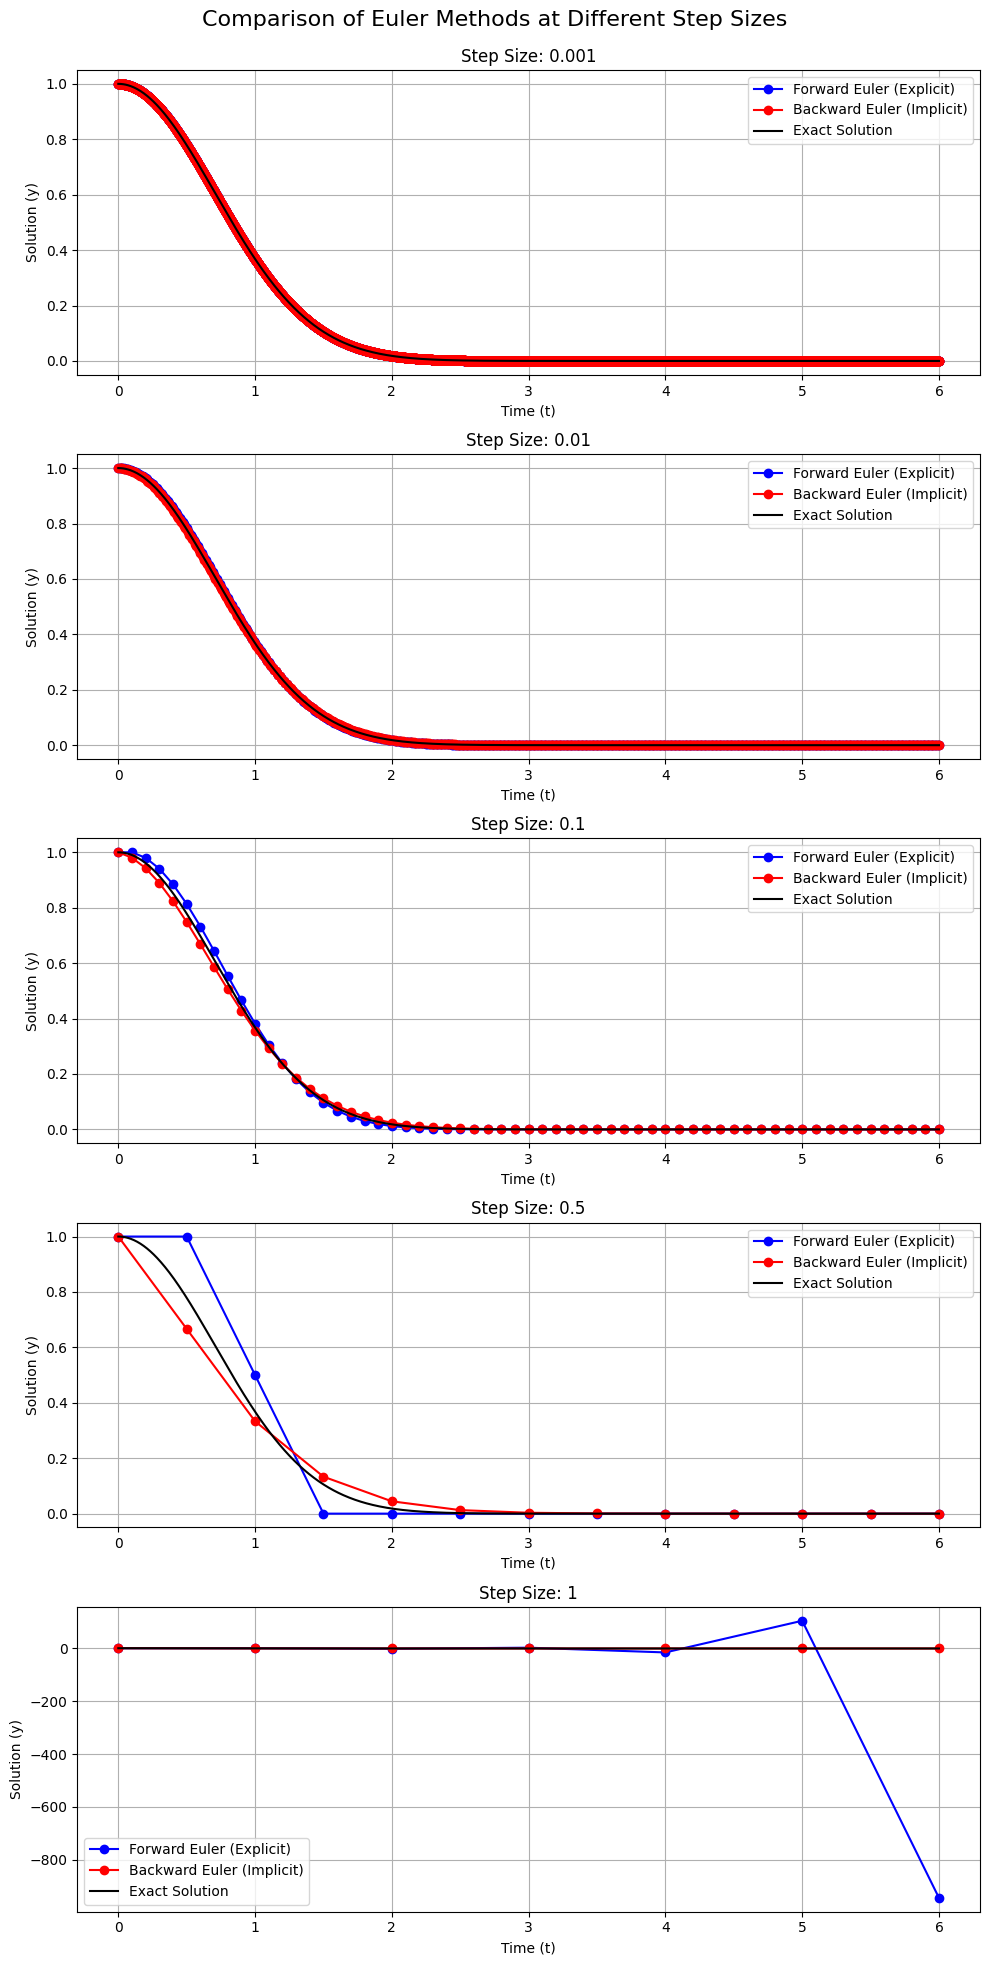

In [3]:
# ODE function
def f(t, y):
    return -2 * t * y


# Function for exact solution of the ODE dy/dt = -2ty, with initial condition y(0) = 1
def exact_solution(t):
    return np.exp(-t**2)

# Different step sizes
step_sizes = [0.001, 0.01, 0.1, 0.5, 1]
y0 = 1
t0 = 0
tf = 6

# Plot setup
fig, axs = plt.subplots(len(step_sizes), 1, figsize=(10, 20))
fig.suptitle('Comparison of Euler Methods at Different Step Sizes', fontsize=16)

# Generate exact solution data
t_exact = np.linspace(t0, tf, 1000)
y_exact = exact_solution(t_exact)

# Plotting for each step size
for i, h in enumerate(step_sizes):
    # Solve using both methods with the current step size
    t_forward, y_forward = forward_euler(f, y0, t0, tf, h)
    t_backward, y_backward = backward_euler(f, y0, t0, tf, h)

    # Plotting on subplot
    axs[i].plot(t_forward, y_forward, 'b-o', label='Forward Euler (Explicit)')
    axs[i].plot(t_backward, y_backward, 'r-o', label='Backward Euler (Implicit)')
    axs[i].plot(t_exact, y_exact, label='Exact Solution', linestyle='-', color='black')
    axs[i].set_title(f'Step Size: {h}')
    axs[i].set_xlabel('Time (t)')
    axs[i].set_ylabel('Solution (y)')
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


As we can see, as step size increase, the explicit method becomes less and less stable and at step size = 1, the solution generated a convergence issue. Meanwhile the implicit method maintained stability disregarding the step size. The root cause of this difference is in their fundamental use of the gradient. Using forward/explicit method we are essentially predicting the next step based the current information, which will eventually have a build up of errors, also sensitive to rapid change in the equation. When using backward/inplicit method, as in the derivative approximation we are also dependent on y<sub>n+1</sub>, we are using the slope from the future, implies the future has an impact on the current calculation, thus creating a feedback mechanism and allows self-correction.

To choose which method one might use, we have to consider the nature of our differential equation. For stiff problems, where rapid changes in the solution occur, implicit methods (like Backward Euler) are often preferred. Their larger stability regions allow for larger time steps without causing instability. Examples include certain chemical reaction kinetics or tightly coupled physical processes. For non-stiff problems, explicit methods (like Forward Euler) are usually sufficient and more computationally efficient due to their simplicity and the fact that they don't require solving a system of equations at each step. Also we have to take in consideration of the computational resourses we have, so if we are limited on the resourses, a simpler explicit method shoudl be considered.

In summary, the choice of a numerical method for solving ODEs should be guided by a balance between the problem's requirements (stiffness, accuracy) and practical considerations (computational resources, ease of implementation). Often, it is beneficial to start with a simpler method and move to more complex ones if the need arises. In some cases, a combination of methods might be used, such as starting with an explicit method for an initial non-stiff part of the problem and switching to an implicit method as the equations become stiffer.

## 2) Runge-Kutta vs Linear Multistep Methods
In this question I will compare Runge-Kutta methods to Multistep Methods. As they are both very useful methods and they have their distinct benefits in different scenario, I would focus on their efficiency in different cases. This answer will sythesis based on lecture definition, and expand further with my own generate examples.

Runge-Kutta methods (RKs) and Linear Multistep Methods (LMMs) are both highly accurate numerical method for solving ODEs. LLMs approximate the solution at a future time step by using a linear combination of the function values (which can be interpreted as 'positions') and their derivatives (akin to 'gradients') from several previous time steps. RKs estimate the solution of an ODE at a future time step by calculating several intermediate values (known as stages) within each step. Each stage involves evaluating the derivative of the function at various points between the current and the next time step. The final value for each step is then determined by a weighted average of these derivatives. 


In a way RKs and LLMs are very similar as boths requires using a linear combination of multiple point's information (position & gradient), to approximate a future step. However, unlike LLMs that rely on information from multiple previous steps, RKs methods are single-step: each new value is computed based solely on information from the current step. This approach balances computational efficiency with high accuracy, making Runge-Kutta methods especially popular in various applications where reliable and precise solutions are required. LMMs on the other hand incorporate data from multiple past steps, providing a potentially more accurate and efficient means of computing the solution's future state.

It is not definitive to choose one family of methods over the other as they are both highly accurate and efficient, so in different cases of scenarios, different methods should be choosed. 

A brief overview listing the strength and disadvantage of use both methods:
## Runge-Kutta methods
### Advantages
- Accuracy: Higher-order RK methods (like RK4) are known for their accuracy across a wide range of problems.

- Simplicity of Implementation: RK methods are generally easier to implement, especially for lower-order methods.

- Adaptive Capability: They can be easily adapted for variable step sizes, especially in adaptive RK methods.

### Disadvantages
- Computational Intensity: Especially for higher-order methods, RK methods can require a significant number of function evaluations per step.

- Less Efficient for Stiff Problems: Explicit RK methods may require very small step sizes to maintain stability in stiff problems.

## Linear Multistep methods
### Advantages
- Efficiency: LLMs can be more efficient than RK methods as they reuse information from previous steps.

- Higher-Order Accuracy: Capable of achieving high accuracy without significantly increasing the computational complexity per step.

- Long-Term Integration: They are often more effective in long-term integration of ODEs, maintaining stability and accuracy over longer intervals.

### Disadvantages
- Complexity in Implementation: Higher-order LLMs and implicit LLMs can be more complex to implement.

- Requirement of Starting Values: LLMs are not self-starting and require initial values for multiple previous steps, which might need to be computed using another method.

### Accuracy and time comparison for non-stiff equation
Start the comparison with the accuracy and time usage for non-stiff equation

Execution time of RK4: 0.08663773536682129 seconds
Execution time of adams-bashforth LLM: 0.030289173126220703 seconds

Root Mean Square Error (RK4): 0.12228688945690311
Root Mean Square Error (Adams-Bashforth 2-step): 0.12228689017856906


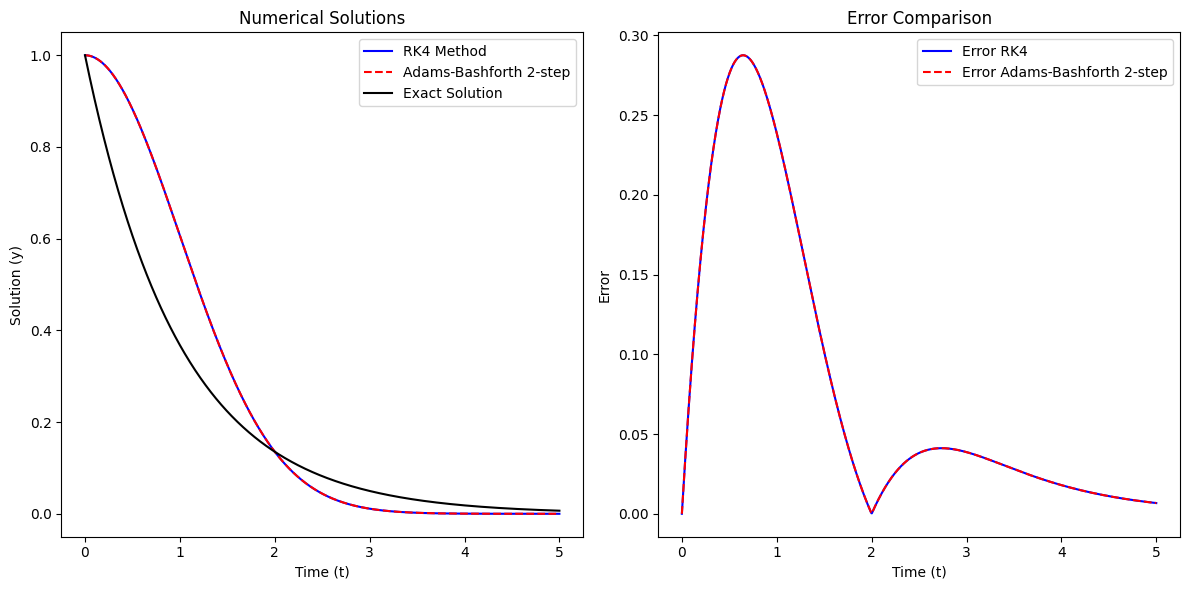

In [35]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define the ODE function and the exact solution
def ode_function(y, lambda_val=1):
    return -lambda_val * y

def exact_solution(t, y0=1, lambda_val=1):
    return y0 * np.exp(-lambda_val * t)

# Implementing the RK4 method
def rk4_method(f, y0, t0, tf, h):
    t_values = np.arange(t0, tf, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        k1 = h * f(t_values[i - 1], y_values[i - 1])
        k2 = h * f(t_values[i - 1] + h / 2, y_values[i - 1] + k1 / 2)
        k3 = h * f(t_values[i - 1] + h / 2, y_values[i - 1] + k2 / 2)
        k4 = h * f(t_values[i - 1] + h, y_values[i - 1] + k3)
        y_values[i] = y_values[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t_values, y_values

# Implementing the Adams-Bashforth two-step method
def adams_bashforth_two_step(f, y0, t0, tf, h):
    # Need to use another method (like RK4) to get the second starting value
    t_values = np.arange(t0, tf, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0
    # Using RK4 for the first step
    y_values[1] = y_values[0] + h * f(t_values[0], y_values[0])

    for i in range(1, len(t_values) - 1):
        y_values[i + 1] = y_values[i] + (3 / 2) * h * f(t_values[i], y_values[i]) - (1 / 2) * h * f(t_values[i - 1], y_values[i - 1])

    return t_values, y_values

# Parameters
y0 = 1
t0 = 0
tf = 5
h = 0.0001

# Solve using both methods
# Start time
start_time = time.time()

# Solve using both methods
t_rk4, y_rk4 = rk4_method(ode_function, y0, t0, tf, h)

# End time
end_time = time.time()
# Calculate execution time
execution_time = end_time - start_time
print("Execution time of RK4:", execution_time, "seconds")

start_time = time.time()
t_ab2, y_ab2 = adams_bashforth_two_step(ode_function, y0, t0, tf, h)

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print("Execution time of adams-bashforth LLM:", execution_time, "seconds\n")

# Exact solution
t_exact = np.linspace(t0, tf, 1000)
y_exact = exact_solution(t_exact)

# Calculate errors
error_rk4 = np.abs(y_exact - np.interp(t_exact, t_rk4, y_rk4))
error_ab2 = np.abs(y_exact - np.interp(t_exact, t_ab2, y_ab2))

# Calculate root mean square error (RMSE)
rmse_rk4 = np.sqrt(np.mean(error_rk4**2))
rmse_ab2 = np.sqrt(np.mean(error_ab2**2))

# Print the RMSE for both methods
print("Root Mean Square Error (RK4):", rmse_rk4)
print("Root Mean Square Error (Adams-Bashforth 2-step):", rmse_ab2)

# Plotting the solutions and errors
plt.figure(figsize=(12, 6))

# Solution plot
plt.subplot(1, 2, 1)
plt.plot(t_rk4, y_rk4, 'b-', label='RK4 Method')
plt.plot(t_ab2, y_ab2, 'r--', label='Adams-Bashforth 2-step')
plt.plot(t_exact, y_exact, 'k', label='Exact Solution')
plt.xlabel('Time (t)')
plt.ylabel('Solution (y)')
plt.title('Numerical Solutions')
plt.legend()

# Error plot
plt.subplot(1, 2, 2)
plt.plot(t_exact, error_rk4, 'b-', label='Error RK4')
plt.plot(t_exact, error_ab2, 'r--', label='Error Adams-Bashforth 2-step')
plt.xlabel('Time (t)')
plt.ylabel('Error')
plt.title('Error Comparison')
plt.legend()

plt.tight_layout()
plt.show()


Execution time of RK4: 151.07717776298523 seconds
Execution time of Adams-Bashforth 2-step: 50.86426496505737 seconds



/Users/zd1420/anaconda3/envs/dsml4p/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


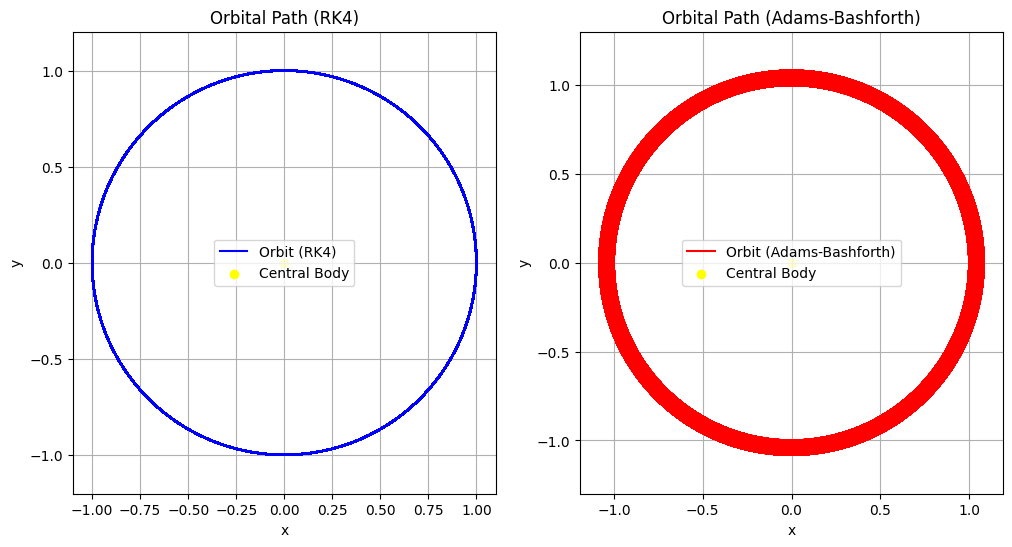

In [36]:
def orbital_dynamics(t, state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    return np.array([vx, vy, -x/r**3, -y/r**3])



def rk4_method_system(f, y0, t0, tf, h):
    t_values = np.arange(t0, tf, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        k1 = h * f(t_values[i - 1], y_values[i - 1])
        k2 = h * f(t_values[i - 1] + h / 2, y_values[i - 1] + k1 / 2)
        k3 = h * f(t_values[i - 1] + h / 2, y_values[i - 1] + k2 / 2)
        k4 = h * f(t_values[i - 1] + h, y_values[i - 1] + k3)
        y_values[i] = y_values[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t_values, y_values

def adams_bashforth_two_step_system(f, y0, t0, tf, h):
    # Number of steps
    num_steps = int((tf - t0) / h) + 1
    t_values = np.linspace(t0, tf, num_steps)
    y_values = np.zeros((num_steps, len(y0)))
    y_values[0] = y0

    # Use RK4 to get the first step
    y_values[1] = rk4_method_system(f, y0, t0, t0 + h, h)[1][-1]

    for i in range(1, len(t_values) - 1):
        y_values[i + 1] = y_values[i] + (3/2) * h * f(t_values[i], y_values[i]) \
                                       - (1/2) * h * f(t_values[i - 1], y_values[i - 1])

    return t_values, y_values


def calculate_rmse(y_approx, t_approx, y_ref, t_ref):
    # Interpolate the approximate solution to the reference time points
    y_interp = np.array([np.interp(t_ref, t_approx, y_approx[:, i]) for i in range(y_approx.shape[1])]).T
    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_ref - y_interp)**2, axis=0))
    return rmse


# Initial conditions for a circular orbit
x0, y0, vx0, vy0 = 1, 0, 0, 1
# Time parameters
t0 = 0
tf = 100000 # Simulate for 10 units of time
h = 0.01  # Time step
initial_state = np.array([x0, y0, vx0, vy0])

start_time = time.time()
# Solve the ODE using RK4 method
t_rk4, y_rk4 = rk4_method_system(orbital_dynamics, initial_state, t0, tf, h)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time of RK4:", execution_time, "seconds")

start_time = time.time()
# Solve using the Adams-Bashforth two-step method
t_ab2, y_ab2 = adams_bashforth_two_step_system(orbital_dynamics, initial_state, t0, tf, h)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time of Adams-Bashforth 2-step:", execution_time, "seconds\n")

# Plotting the orbits
plt.figure(figsize=(12, 6))

# Orbit using RK4
plt.subplot(1, 2, 1)
plt.plot(y_rk4[:, 0], y_rk4[:, 1], 'b-', label='Orbit (RK4)')
plt.scatter([0], [0], color='yellow', label='Central Body')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbital Path (RK4)')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Orbit using Adams-Bashforth
plt.subplot(1, 2, 2)
plt.plot(y_ab2[:, 0], y_ab2[:, 1], 'r-', label='Orbit (Adams-Bashforth)')
plt.scatter([0], [0], color='yellow', label='Central Body')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbital Path (Adams-Bashforth)')
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.show()


As can see, RK4 has higher accuarcy than LLMs, but requires a much higher computational resources and time. LLMs on the other hands is not as accurate but still acceptablebut, and it only takes 1/3 of the RKs time to reach the final result.

Below is a convergence analysis of the two methods.

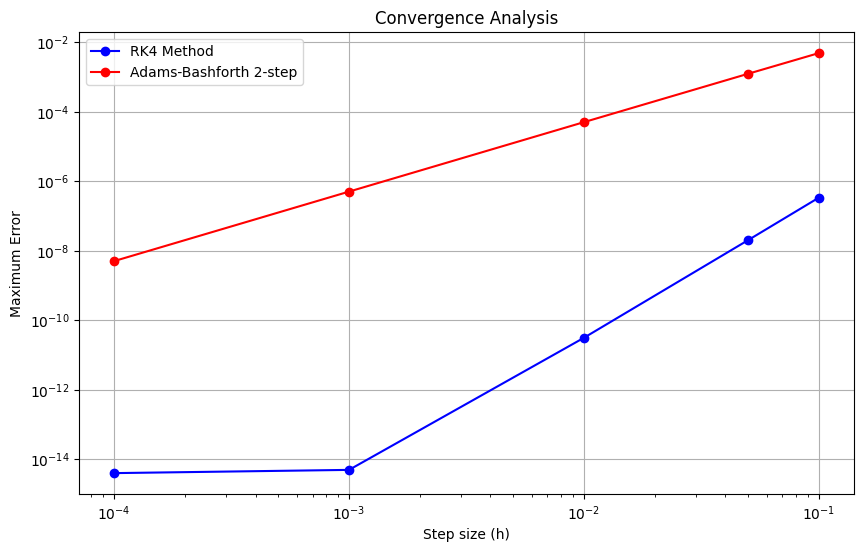

In [22]:
# Define the ODE function and the exact solution
def f(t, y, lambda_val=1):
    # Example ODE function (replace with your specific function)
    return -lambda_val*y

def exact_solution(t, y0=1, lambda_val=1):
    # Exact solution of the ODE (replace with your specific solution)
    return y0*np.exp(-lambda_val*t)

# RK4 and Adams-Bashforth methods (assuming these are already defined)

# Set the initial conditions and time interval
y0 = 1
t0 = 0
tf = 100

# Different step sizes for convergence analysis
h_values = [0.1, 0.05, 0.01, 0.001, 0.0001]

# Initialize lists to store maximum errors
errors_rk4 = []
errors_ab2 = []

# Perform the convergence analysis
for h in h_values:
    # Solve the ODE using both methods
    t_rk4, y_rk4 = rk4_method(f, y0, t0, tf, h)
    t_ab2, y_ab2 = adams_bashforth_two_step(f, y0, t0, tf, h)

    # Exact solution for comparison
    y_exact = exact_solution(t_rk4)  # Same time points as RK4

    # Calculate maximum errors
    error_rk4 = np.max(np.abs(y_exact - y_rk4))
    error_ab2 = np.max(np.abs(exact_solution(t_ab2) - y_ab2))

    errors_rk4.append(error_rk4)
    errors_ab2.append(error_ab2)

# Plotting the convergence
plt.figure(figsize=(10, 6))
plt.loglog(h_values, errors_rk4, 'b-o', label='RK4 Method')
plt.loglog(h_values, errors_ab2, 'r-o', label='Adams-Bashforth 2-step')
plt.xlabel('Step size (h)')
plt.ylabel('Maximum Error')
plt.title('Convergence Analysis')
plt.legend()
plt.grid(True)
plt.show()


## A stiff equation
As shown below when dealing with stiff equaitons, explicit LLMs will struggle to return accurate result.

Root Mean Square Error (RK4): 0.00668450528699571
Root Mean Square Error (Adams-Bashforth 2-step): 0.1944621909543546


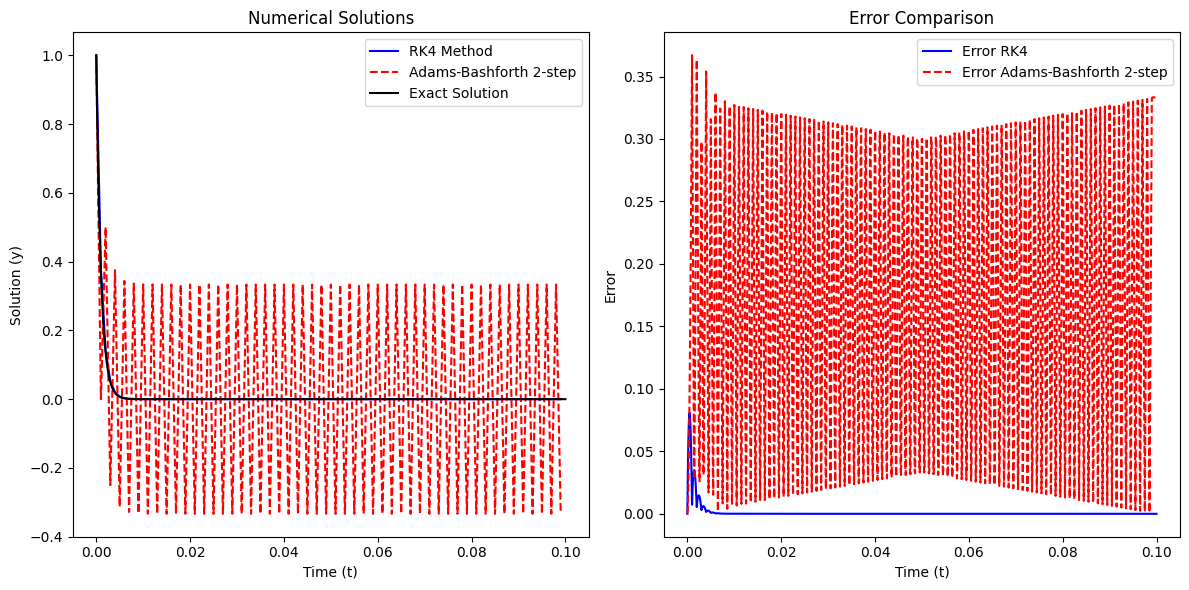

In [8]:
# Define the ODE function (lambda = -1000)
lambda_val = -1000
def ode_function(t, y):
    return lambda_val * y

# Exact solution for comparison
def exact_solution(t):
    return np.exp(lambda_val * t)

# Parameters for solving the ODE
y0 = 1
t0 = 0
tf = 0.1
h = 0.001  # Small step size for stability in RK4

# Solve the ODE
t_rk4, y_rk4 = rk4_method(ode_function, y0, t0, tf, h)
t_ab2, y_ab2 = adams_bashforth_two_step(ode_function, y0, t0, tf, h)

# Exact solution
t_exact = np.linspace(t0, tf, 1000)
y_exact = exact_solution(t_exact)

# Calculate errors
error_rk4 = np.abs(y_exact - np.interp(t_exact, t_rk4, y_rk4))
error_ab2 = np.abs(y_exact - np.interp(t_exact, t_ab2, y_ab2))

# Calculate root mean square error (RMSE)
rmse_rk4 = np.sqrt(np.mean(error_rk4**2))
rmse_ab2 = np.sqrt(np.mean(error_ab2**2))

# Print the RMSE for both methods
print("Root Mean Square Error (RK4):", rmse_rk4)
print("Root Mean Square Error (Adams-Bashforth 2-step):", rmse_ab2)

# Plotting the solutions and errors
plt.figure(figsize=(12, 6))

# Solution plot
plt.subplot(1, 2, 1)
plt.plot(t_rk4, y_rk4, 'b-', label='RK4 Method')
plt.plot(t_ab2, y_ab2, 'r--', label='Adams-Bashforth 2-step')
plt.plot(t_exact, y_exact, 'k', label='Exact Solution')
plt.xlabel('Time (t)')
plt.ylabel('Solution (y)')
plt.title('Numerical Solutions')
plt.legend()

# Error plot
plt.subplot(1, 2, 2)
plt.plot(t_exact, error_rk4, 'b-', label='Error RK4')
plt.plot(t_exact, error_ab2, 'r--', label='Error Adams-Bashforth 2-step')
plt.xlabel('Time (t)')
plt.ylabel('Error')
plt.title('Error Comparison')
plt.legend()

plt.tight_layout()
plt.show()


## 3) Finite difference vs finite element methods

To answer this question, I would focus on the fundamental difference in the way these two methods approximate and discretize a domain. I would mainly use my own explanation, as well as some image example from the lecture notes.

Finite difference methods are a family of numerical methods to solve differential equations. All the previous methods we discussed above belongs to this family, where we discretize the domain we want to approximate into smaller equal paced grid points. Both FDM and FEM aim to provide numerical solutions to differential equations, particularly partial differential equations (PDEs) in various applications. They involves discretizing the domain of the problem, breaking it down into smaller, manageable parts for numerical analysis, and they both methods approximate the unknown function (solution to the differential equation) using a set of discrete values.

However, theey are different in their method to discretizing the domain and the methods of approximation. FDM discretizes the domain into a grid of points, often equally spaced, and directly approximates the derivatives at these points using finite differences. FEM, on the other hand, divides the domain into elements of various shapes (like lines, triangles, or tetrahedra) and uses often piecewise polynomial functions within these elements to approximate the solution. 

![Discretizing](./FEMFDM.jpeg)

Dive deeper into the nature of approximation, in FDM, the differential equations are approximated locally at each grid point, primarily focusing on the derivatives, which we used to predict future steps. FEM on the other hands employs a global approach, often using a weak formulation, where the solution is found by integrating the differental equation, and then try to fit on an often piecewise polynomial function over the element span to try to minimize the error between. Therefore, the noded of the fitted solution don't has to be on the exact solution.

Considering an example from the lecture:

<img src="./CG_DG_projection.png" style="width: 600px">

When using the FEM to approximate 
$$
f(x) = \sin(2 \pi x) + 0.3 \cos(6 \pi x^2)
$$

We have the freedom to not have the nodes on each elements on the excat solution. Whereas, when using FDM, we must at least starts from a known points and predict future steps based in future updation. This shows the powerfulness when using FEM, as it is a global approximation scheme that where we are trying to minimize the error locally at each different element segment, and thus avoid the accumulation of error over the steps as we haves in the FDM scheme.

The disadvantages using FEM is that, they aregenerally more complex to implement than FDM, particularly in terms of mesh generation and the formulation of element matrices. Also, depending on the problem and the element types used, FEM can be computationally intensive, especially for 3D problems or higher-order elements.

Therefore, when choosing which method to use, we have to consider the function or the system we are trying to approximate. Generally FEM should be used for complex geometry and highly variational functions, whereas ordinary and simple geometry system, FDM should be sufficient.
